In [1]:
#Fitting regression model to google stock prices
#we are creating a model which will predict the Adj. close value of the stock price(35 days into the future)
import pandas as pd
import numpy as np
import quandl, math, datetime

In [2]:
df = quandl.get('WIKI/GOOGL')
#quandl default return value is a pandas dataframe
print(df)

                Open     High      Low     Close      Volume  Ex-Dividend  \
Date                                                                        
2004-08-19   100.010   104.06    95.96   100.335  44659000.0          0.0   
2004-08-20   101.010   109.08   100.50   108.310  22834300.0          0.0   
2004-08-23   110.760   113.48   109.05   109.400  18256100.0          0.0   
2004-08-24   111.240   111.60   103.57   104.870  15247300.0          0.0   
2004-08-25   104.760   108.00   103.88   106.000   9188600.0          0.0   
2004-08-26   104.950   107.95   104.66   107.910   7094800.0          0.0   
2004-08-27   108.100   108.62   105.69   106.150   6211700.0          0.0   
2004-08-30   105.280   105.49   102.01   102.010   5196700.0          0.0   
2004-08-31   102.320   103.71   102.16   102.370   4917800.0          0.0   
2004-09-01   102.700   102.97    99.67   100.250   9138200.0          0.0   
2004-09-02    99.090   102.37    98.94   101.510  15118600.0          0.0   

In [3]:
print(len(df))

3424


In [4]:
#now we will remove some redundand features
df = df[['Adj. Open', 'Adj. High', 'Adj. Low', 'Adj. Close', 'Adj. Volume']]
df['HL_PCT']=(df['Adj. High'] - df['Adj. Close'])/df['Adj. Close']*100
df['PCT_Change']=(df['Adj. Close'] - df['Adj. Open'])/df['Adj. Open']*100
#here we merged some features to make new meaningful features(high-low percent and percent change)

In [5]:
df=df[['Adj. Close','HL_PCT','PCT_Change','Adj. Volume']]
print(df.head())

            Adj. Close    HL_PCT  PCT_Change  Adj. Volume
Date                                                     
2004-08-19   50.322842  3.712563    0.324968   44659000.0
2004-08-20   54.322689  0.710922    7.227007   22834300.0
2004-08-23   54.869377  3.729433   -1.227880   18256100.0
2004-08-24   52.597363  6.417469   -5.726357   15247300.0
2004-08-25   53.164113  1.886792    1.183658    9188600.0


In [6]:
forecast_col = 'Adj. Close'
#we can't work with NaN's in mL so we need to replace it or drop that row containing NaN. so if we drop it there may be data loss because that dropped row will have some useful info in other columns
#best way is to replace it by -99999 i.e. it should not affect our learning because it will behave as an outlier
df.fillna(-99999, inplace= True)#here we are filling all the NaN's as -99999 and  Inplace = True allows us to modify the dataframe in place. Basically allowing us to not duplicate memory and modify the variable without needing to re-assign it 

In [7]:
forecast_out= int(math.ceil(0.1*len(df)))
print(forecast_out)

343


In [8]:
#So basically we are creating a model which will predict the Adj. close value of the stock price in next 35 days(future) 
#we are trying to predict todays stock price from the data that came 35 days ago
#we need a label since it is supervised learning
#so we will create 'Value' label which will contain aaj se 35 days agaey ka Adj. close value of stock price

In [9]:
df['Label']=df[forecast_col].shift(-forecast_out)
#here we are shifting the entire Adj. close col upwards by 35 units and storing it in our label
print(df.tail())

            Adj. Close    HL_PCT  PCT_Change  Adj. Volume  Label
Date                                                            
2018-03-21     1094.00  1.343693    0.130884    1990515.0    NaN
2018-03-22     1053.15  2.921711   -2.487014    3418154.0    NaN
2018-03-23     1026.55  3.918952   -2.360729    2413517.0    NaN
2018-03-26     1054.09  0.491419    0.332191    3272409.0    NaN
2018-03-27     1006.94  5.720301   -5.353887    2940957.0    NaN


In [10]:
#hence in value column we will get 35 NaN's at end so we need to drop that

In [11]:
df.dropna(inplace=True)#it will drop all NaN's wali rows so 3424-35 = 3389
print(df)

            Adj. Close    HL_PCT  PCT_Change  Adj. Volume        Label
Date                                                                  
2004-08-19   50.322842  3.712563    0.324968   44659000.0   214.005615
2004-08-20   54.322689  0.710922    7.227007   22834300.0   210.725489
2004-08-23   54.869377  3.729433   -1.227880   18256100.0   208.072299
2004-08-24   52.597363  6.417469   -5.726357   15247300.0   218.288837
2004-08-25   53.164113  1.886792    1.183658    9188600.0   223.309335
2004-08-26   54.122070  0.037068    2.820391    7094800.0   226.318624
2004-08-27   53.239345  2.326896   -1.803885    6211700.0   233.550949
2004-08-30   51.162935  3.411430   -3.106003    5196700.0   234.172919
2004-08-31   51.343492  1.308977    0.048866    4917800.0   235.607297
2004-09-01   50.280210  2.713217   -2.385589    9138200.0   236.545192
2004-09-02   50.912161  0.847207    2.442224   15118600.0   232.532806
2004-09-03   50.159839  1.729827   -0.931154    5152400.0   233.846863
2004-0

In [12]:
print(len(df))#length after dropping the rows

3081


In [13]:
X = np.array(df.drop(['Label'],1))#here 1 refers to axis 1 i.e. column wise
#feature scaling
from sklearn import preprocessing
X = preprocessing.scale(X)
X_lately = X[-forecast_out:]#here X_lately contains last 35 latest entries of X
X = X[:-forecast_out]#we removed last 35 days from X
df.dropna(inplace=True)#dropping NaN's wali rows

In [14]:
print(df.tail())

            Adj. Close    HL_PCT  PCT_Change  Adj. Volume    Label
Date                                                              
2016-11-04      781.10  0.944821    1.270582    1970603.0  1094.00
2016-11-07      802.03  0.370310    0.890622    1992570.0  1053.15
2016-11-08      811.98  0.500012    1.240602    1769069.0  1026.55
2016-11-09      805.59  0.759692    0.468927    3098510.0  1054.09
2016-11-10      780.29  3.815248   -3.667901    5909609.0  1006.94


In [15]:
df.dropna (inplace=True)
y=np.array(df['Label'])
y = y[:-forecast_out]#so that X and y have same length

In [16]:
print(len(y))

2738


In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [18]:
import pickle
from sklearn.linear_model import LinearRegression
# regressor = LinearRegression()                                  
# regressor.fit(X_train, y_train)
# with open('LinearRegression.pickle','wb') as f:
#     pickle.dump(regressor, f)

#as we can see that pickling is saving us lot of time i.e. we dont need to train the classifier everytime we run the code
#pickle is used for serializing and de-serializing a Python object structure i.e. it converts python objects into byte stream and back
pickle_in = open('LinearRegression.pickle','rb')
regressor = pickle.load(pickle_in)
accuracy = regressor.score(X_test, y_test)

In [19]:
print(accuracy)

0.7547035645694968


In [20]:
#we get an accuracy of 97%

In [21]:
forecast_set = regressor.predict(X_lately)
df['Forecast'] = np.nan
last_date = df.iloc[-1].name#here this gets the date from the last entry of the df
last_unix = last_date.timestamp()
one_day = 86400
next_unix = last_unix + one_day


for i in forecast_set:#i iteraters through forecast set
    next_date = datetime.datetime.fromtimestamp(next_unix)
    next_unix += one_day
    df.loc[next_date] = [np.nan for _ in range(len(df.columns)-1)]+[i]#this fills NaN's in last 35 columns of df except forecast cut we are forecasting 35 days agey ka

In [22]:
print(forecast_set)

[ 686.46283922  674.7571441   679.10637245  694.13951755  714.94063112
  730.67337168  731.47611612  754.14230225  883.33306198  876.82597305
  879.54118661  878.46255365  851.52027213  824.53885042  830.25418137
  833.49254002  836.13868349  839.69906037  830.38783928  840.24538769
  835.50224287  851.02526363  847.56536742  840.00732261  837.68483166
  872.72201654  875.94695851  869.15786218  873.38088465  880.06218624
  872.31014719  878.97694394  858.4707205   809.3285071   772.02998823
  766.51868604  832.20390681  844.18590176  833.2223752   816.06460814
  791.35202082  813.83474614  802.09262186  791.91579553  812.45260346
  810.48598411  821.68309056  827.9103256   824.08169045  840.33808569
  841.64558584  848.33622218  834.13362773  843.43777378  824.47594094
  824.5150022   827.02863357  805.81439184  784.22738726  782.48207656
  803.05150197  809.72244962  829.12035605  849.44954304  848.88875883
  846.90028013  843.24418768  849.03226624  856.09452843  864.34872907
  860.

In [23]:
print(df)#so df ke last 35 entries mei sirf forecast dikhega baki sab mei NaN's

                     Adj. Close    HL_PCT  PCT_Change  Adj. Volume  \
Date                                                                 
2004-08-19 00:00:00   50.322842  3.712563    0.324968   44659000.0   
2004-08-20 00:00:00   54.322689  0.710922    7.227007   22834300.0   
2004-08-23 00:00:00   54.869377  3.729433   -1.227880   18256100.0   
2004-08-24 00:00:00   52.597363  6.417469   -5.726357   15247300.0   
2004-08-25 00:00:00   53.164113  1.886792    1.183658    9188600.0   
2004-08-26 00:00:00   54.122070  0.037068    2.820391    7094800.0   
2004-08-27 00:00:00   53.239345  2.326896   -1.803885    6211700.0   
2004-08-30 00:00:00   51.162935  3.411430   -3.106003    5196700.0   
2004-08-31 00:00:00   51.343492  1.308977    0.048866    4917800.0   
2004-09-01 00:00:00   50.280210  2.713217   -2.385589    9138200.0   
2004-09-02 00:00:00   50.912161  0.847207    2.442224   15118600.0   
2004-09-03 00:00:00   50.159839  1.729827   -0.931154    5152400.0   
2004-09-07 00:00:00 

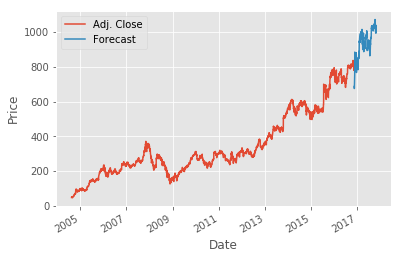

In [25]:
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')

df['Adj. Close'].plot()
df['Forecast'].plot()
plt.legend()
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()